# Creating a K-means clusterig model to find the fault classes in a PV installation

Importing Modules

In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_new=pd.read_excel('time.xlsx')

In [3]:
df_new

,TIME,T,G,P
0,03:54:00,3,0.0,0.0
1,03:55:00,3,0.0,0.0
2,03:56:00,3,0.0,0.0
3,03:57:00,3,0.0,0.0
4,03:58:00,3,0.0,0.0
...,...,...,...,...
97195,1900-01-06 21:49:00,21,0.0,0.0
97196,1900-01-06 21:50:00,21,0.0,0.0
97197,1900-01-06 21:51:00,21,0.0,0.0
97198,1900-01-06 21:52:00,21,0.0,0.0


to add the new columns to the dataframe, we need to convert the lists to a pandas series so that the empty rows will be 
filled as 'NAN'

In [4]:
df_new=df_new.drop(columns=['TIME'])

In [5]:
df_new

,T,G,P
0,3,0.0,0.0
1,3,0.0,0.0
2,3,0.0,0.0
3,3,0.0,0.0
4,3,0.0,0.0
...,...,...,...
97195,21,0.0,0.0
97196,21,0.0,0.0
97197,21,0.0,0.0
97198,21,0.0,0.0


In [6]:
m = df_new['T'].between(8,16,inclusive=False)
g = m.ne(m.shift()).cumsum()
df_new['G_new'] = df_new.groupby(g)['G'].transform('mean')
#export=df.to_excel(r'C:\Users\zahid.hussain\exportdata.xlsx', index=None, header=True)

In [7]:
x = df_new['T'].between(8,16,inclusive=False)
p = x.ne(x.shift()).cumsum()
df_new['P_new'] = df_new.groupby(p)['P'].transform('mean')
#export=df.to_excel(r'C:\Users\zahid.hussain\exportdata.xlsx', index=None, header=True)
df_new

,T,G,P,G_new,P_new
0,3,0.0,0.0,56.205594,123.328396
1,3,0.0,0.0,56.205594,123.328396
2,3,0.0,0.0,56.205594,123.328396
3,3,0.0,0.0,56.205594,123.328396
4,3,0.0,0.0,56.205594,123.328396
...,...,...,...,...,...
97195,21,0.0,0.0,45.375258,9.997262
97196,21,0.0,0.0,45.375258,9.997262
97197,21,0.0,0.0,45.375258,9.997262
97198,21,0.0,0.0,45.375258,9.997262


In [8]:
df_new=df_new.drop(columns=['T','G','P'])

In [9]:
df_new

,G_new,P_new
0,56.205594,123.328396
1,56.205594,123.328396
2,56.205594,123.328396
3,56.205594,123.328396
4,56.205594,123.328396
...,...,...
97195,45.375258,9.997262
97196,45.375258,9.997262
97197,45.375258,9.997262
97198,45.375258,9.997262


exporting to excel for verification

In [10]:
export=df_new.to_excel(r'C:\Users\zahid.hussain\g_p_avg2.xlsx', index=None, header=True)

to get the unique average values between 8-16 (9-15 actual readingds)

In [11]:
z=df_new.P_new.unique()

In [12]:
p=z[1::2]

In [13]:
y=df_new.G_new.unique()

In [14]:
g=y[1::2]

create the new dataframe

In [15]:
df_new = pd.DataFrame({'g_avg':g, 'p_avg':p})
df_new

,g_avg,p_avg
0,140.108917,308.404302
1,236.312436,519.628464
2,184.061955,403.916031
3,126.781479,279.268931
4,206.944010,455.222386
...,...,...
65,136.385092,30.025310
66,286.297398,62.956717
67,301.259807,66.244266
68,136.058879,30.015204


In [16]:
df_new.shape

(70, 2)

In [17]:
export=df_new.to_excel(r'C:\Users\zahid.hussain\ng.xlsx', index=None, header=True)

In [18]:
df_new['avg_ratio'] = df_new['g_avg'] / df_new['p_avg']

In [19]:
df_new

,g_avg,p_avg,avg_ratio
0,140.108917,308.404302,0.454303
1,236.312436,519.628464,0.454772
2,184.061955,403.916031,0.455694
3,126.781479,279.268931,0.453976
4,206.944010,455.222386,0.454600
...,...,...,...
65,136.385092,30.025310,4.542338
66,286.297398,62.956717,4.547527
67,301.259807,66.244266,4.547711
68,136.058879,30.015204,4.532999


In [20]:
df_new=df_new.drop(columns=['g_avg','p_avg'])

In [21]:
df_new

,avg_ratio
0,0.454303
1,0.454772
2,0.455694
3,0.453976
4,0.454600
...,...
65,4.542338
66,4.547527
67,4.547711
68,4.532999


In [22]:
df_new = df_new.reset_index()

In [23]:
df_new.loc[df_new['avg_ratio'].idxmax()]

index        67.000000
avg_ratio     4.547711
Name: 67, dtype: float64

In [24]:
X=df_new.values

In [25]:
z=linkage(X,'single')

In [26]:
df_new['cluster']=pd.Series('single')

In [27]:
df_new

,index,avg_ratio,cluster
0,0,0.454303,single
1,1,0.454772,NaN
2,2,0.455694,NaN
3,3,0.453976,NaN
4,4,0.454600,NaN
...,...,...,...
65,65,4.542338,NaN
66,66,4.547527,NaN
67,67,4.547711,NaN
68,68,4.532999,NaN


In [28]:
s=linkage(X,'single')

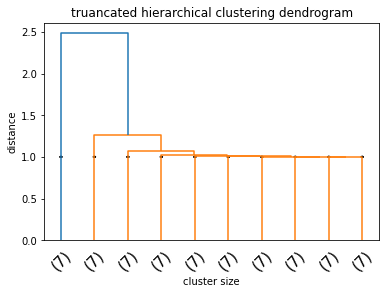

In [29]:
x=dendrogram(s,truncate_mode='lastp', p=10, leaf_rotation=45.,leaf_font_size=15., show_contracted=True)

plt.title('truancated hierarchical clustering dendrogram')
plt.xlabel('cluster size')
plt.ylabel('distance')

#plt.axhline(y=2)
#plt.axhline(y=0.5)

plt.show()

In [30]:
label = fcluster(s, 10, criterion='maxclust')

df_clst = df_new
df_clst['index']  = df_new['index']
df_clst['label']  = label

# print them
for i in range(10):
   elements = df_clst[df_clst['label']==i+1]['index'].tolist()  
   size = len(elements)
   print('\n Cluster {}: N = {}  {}'.format(i+1, size, elements))


 Cluster 1: N = 7  [63, 64, 65, 66, 67, 68, 69]

 Cluster 2: N = 7  [56, 57, 58, 59, 60, 61, 62]

 Cluster 3: N = 7  [49, 50, 51, 52, 53, 54, 55]

 Cluster 4: N = 7  [42, 43, 44, 45, 46, 47, 48]

 Cluster 5: N = 7  [35, 36, 37, 38, 39, 40, 41]

 Cluster 6: N = 7  [28, 29, 30, 31, 32, 33, 34]

 Cluster 7: N = 7  [21, 22, 23, 24, 25, 26, 27]

 Cluster 8: N = 7  [14, 15, 16, 17, 18, 19, 20]

 Cluster 9: N = 7  [0, 1, 2, 3, 4, 5, 6]

 Cluster 10: N = 7  [7, 8, 9, 10, 11, 12, 13]


In [31]:
df_new['clus']=df_clst['label']

In [32]:
df_new.drop(columns=['cluster','clus'],axis=1, inplace=True)

In [33]:
df_new

,index,avg_ratio,label
0,0,0.454303,9
1,1,0.454772,9
2,2,0.455694,9
3,3,0.453976,9
4,4,0.454600,9
...,...,...,...
65,65,4.542338,1
66,66,4.547527,1
67,67,4.547711,1
68,68,4.532999,1


In [34]:
cluster_data=df_new.to_excel(r'C:\Users\zahid.hussain\hier.xlsx', index=None, header=True)